## Exploring Data

### Summary statistics
For exploratory data analysis, I was hoping to find variables that strongly correlate with teams making it out of the group stage. The problem with this line of thought is that most of my varaibles, are continuous and I'm looking to correlate them to a categorical variable. The correlation values and plots churned out material that couldn't be used. Instead, I focused on the basics of EDA, so I looked at the dataframe's summary statistics to get a quick understanding of each variable's characteristics.

In [5]:
# import required libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

# import data
all = pd.read_csv('../data/cleanData/allTables.csv')
allNorm = pd.read_csv('../data/cleanData/allTablesNorm.csv')

# summary statistics
all.drop('Unnamed: 0', axis=1, inplace=True)
all.describe()

,Host,PastGroup,DifficultGroup,RankFIFA,QualiStreak,Caps,eliteClub,Age
count,160.00000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.03750,0.50000,0.250000,23.800000,4.031250,32.725104,4.675000,26.912814
std,0.19058,0.50157,0.434372,18.446864,4.424662,8.703270,5.026408,1.138083
min,0.00000,0.00000,0.000000,1.000000,1.000000,16.565217,0.000000,23.131107
25%,0.00000,0.00000,0.000000,9.000000,1.000000,26.206522,1.000000,26.098034
50%,0.00000,0.50000,0.000000,20.000000,2.000000,32.086957,3.000000,26.914498
75%,0.00000,1.00000,0.250000,34.000000,5.000000,38.717391,8.000000,27.817135
max,1.00000,1.00000,1.000000,91.000000,21.000000,60.478261,18.000000,29.800000


The following comments are ordered from left to right with regard to the above image. I'll talk about variables *DifficultGroup* all the way to *Age*.

- There's nothing much to analyze with the Difficult Group variable; it is a True or False column denoting if a country was in the Death Group. As expected, the mean is 0.50, signifying a properly balanced data set.
- RankFIFA is an interesting feature. This is an official ranking designated by FIFA based on each team's results. Theoretically, we want to see the top 32 teams in the World Cup, but that way we wouldn't be seeing teams from certain regions. It seems that the oldest team had an average age of 29.3 while the youngest sat at 23.1. There's a belief that younger teams lack experience and struggle to make it past a certain stage in the tournament. Hopefully it proves to be an important variable.
- QualiStreak is a count of the consecutive times a team has qualified to the World Cup. I imagine that repeated success in the qualifying stages would lead to more experience in the World Cup which would in turn make the teams outperform in the tournament. One team has qualified 21 times in a row, likely Germany, while other teams are qualifying for the first time in a while, or ever. 
- Caps gives us the average amount of times the players for each team have been called up to the national team. This should be seen as an experience gauge. The higher the average, the more experience, and theoretically the higher likelihood for success. It's likely that this variable will correlate with age, so I might have to drop one of them from the analysis.
- The elite club variable is a counter of players from each team that play in one of Europe's elite clubs (ManU, Bayern, Madrid, etc.). It seems that at some point, a team had 18 out of 23 players playing at the highest level, while smaller teams didn't even have one player involved in elite club level. It would make sense for teams with more elite players to perform well, but if the 2022 Cup is telling us anything, it's that the norm doesn't apply too often.
- The age variable is self explanatory. I see it as a gauge of experience and expect it to have some correaltion with the team's performance. The mean age is ~27 years; a point of optimal physical ability and enough experience to perform well under the pressure.

### Correlation matrix

My first thought was to make a correalation matrix to see if anything moves together with team performance (PastGroup).

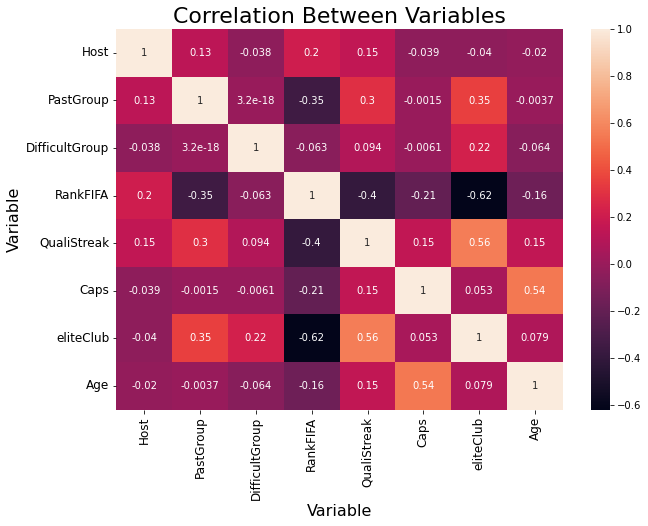

In [19]:
# heatmap of correlations
plt.figure(figsize=(10,7))
sns.heatmap(all.corr(), annot=True)
plt.title('Correlation Between Variables', fontsize=22)
plt.xlabel('Variable', fontsize=16)
plt.ylabel('Variable', fontsize=16)
plt.tick_params('both', labelsize=12);

Initially, I was searching for strong correlations between my variables and the label feature (PastGroup). I was discouraged when I saw the top 3 correlations being between an absolute value of 0.29 and 0.37. But, after some consideration, I realized that if the correlations were high, there would be no need to create models to see who would perform best. So for the time being, I intend on using those three as predictive variables and continue to look for other features that might have stronger correlations.

### Variable distributions

I used the Boxplot to see my summary statistics table in a plot format. This way it would be easier to intuitively understand the numbers.


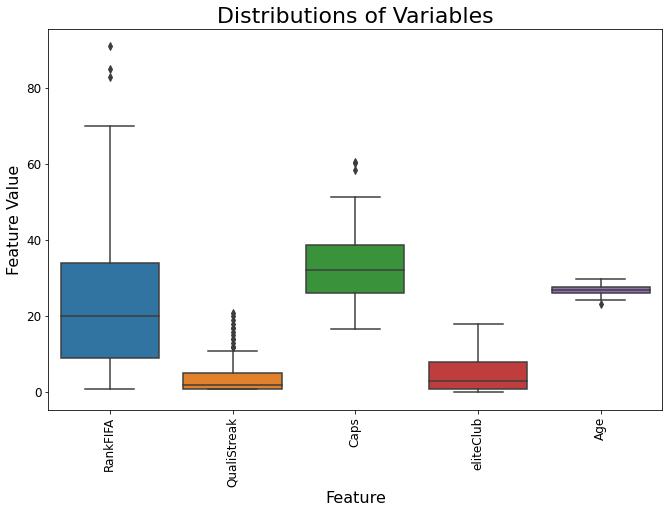

In [29]:
# create a boxplot of variables used
fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(data=all[['RankFIFA','QualiStreak','Caps','eliteClub','Age']], ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Distributions of Variables', fontsize=22)
ax.set_xlabel("Feature", fontsize=16)
ax.set_ylabel("Feature Value", fontsize=16)
plt.tick_params('both', labelsize=12);

This plot provided me with important information from each variable that isn't a True or False variable.

For RankFIFA, the outliers ended up being the host nations who get automatic qualification into the World Cup. Aside from them, the majority of teams come from the 1-40 rank range, as expected. 
QualiStreak has an impressive amount of outliers. This is due to the regional powerhouses that almost always qualify to the World Cup. Think Germany, Mexico, France, etc. 

Caps has a dense center, with most teams' average sitting between 25-40 caps. This makes sense given that outliers on the higher end are those players who were phenoms at a young age and managed to retain their level for a long period of times. A possible next step would be to use the median for these categories rather than the mean. Perhaps certain outliers are influencing the average. Players with 4 or 5 World Cups could easily move the average (Cristiano Ronaldo, Podolski, Memo Ochoa, etc.). 

For eliteClub, there is one outstanding national team that had 18 out of 23 players playing in the elite clubs. My guess would be that it was either Spain, Germany, or France. It would be interesting to see how far all teams with 10+ players in elite clubs made it in the World Cup. 

The age variable here isn't surprising. Given that most soccer players participate in the Cup between the ages of 23 and 33, the compression around the range with almost no outliers is expected. A next step would be to compare the results of the outliers. Would youth or experience yield better results in the tournament?